In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt

print("Modeling libraries loaded")


Modeling libraries loaded


In [2]:
df = pd.read_csv('../data/insurance_ml_ready.csv')

df.head()


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest,BMI_Level_Obese,BMI_Level_Overweight,Risk_Level
0,-1.438764,-0.453320,-0.908614,0.0,1.0,0.0,0.0,1.0,0.0,1.0,High
1,-1.509965,0.509621,-0.078767,1.0,0.0,0.0,1.0,0.0,1.0,0.0,Low
2,-0.797954,0.383307,1.580926,1.0,0.0,0.0,1.0,0.0,1.0,0.0,Low
3,-0.441948,-1.305531,-0.908614,1.0,0.0,1.0,0.0,0.0,0.0,0.0,High
4,-0.513149,-0.292556,-0.908614,1.0,0.0,1.0,0.0,0.0,0.0,1.0,Low


In [3]:
X = df.drop(columns=["Risk_Level"])
y = df["Risk_Level"]

print("X shape:", X.shape)
print("y distribution:")
print(y.value_counts())


X shape: (1338, 10)
y distribution:
Risk_Level
High      455
Low       442
Medium    441
Name: count, dtype: int64


In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (1070, 10)
Test size: (268, 10)


In [6]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(
    max_iter=1000
)

logreg.fit(X_train, y_train)

y_pred_lr = logreg.predict(X_test)


In [7]:
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Random Forest ===
Accuracy: 0.8805970149253731
              precision    recall  f1-score   support

        High       0.95      0.77      0.85        91
         Low       0.86      0.93      0.90        89
      Medium       0.85      0.94      0.89        88

    accuracy                           0.88       268
   macro avg       0.89      0.88      0.88       268
weighted avg       0.89      0.88      0.88       268



In [8]:
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df.head(10)


,Feature,Importance
0,age,0.490271
4,smoker_yes,0.269030
1,bmi,0.126944
2,children,0.050075
3,sex_male,0.016630
6,region_southeast,0.012172
7,region_southwest,0.010916
5,region_northwest,0.010196
9,BMI_Level_Overweight,0.006934
8,BMI_Level_Obese,0.006832


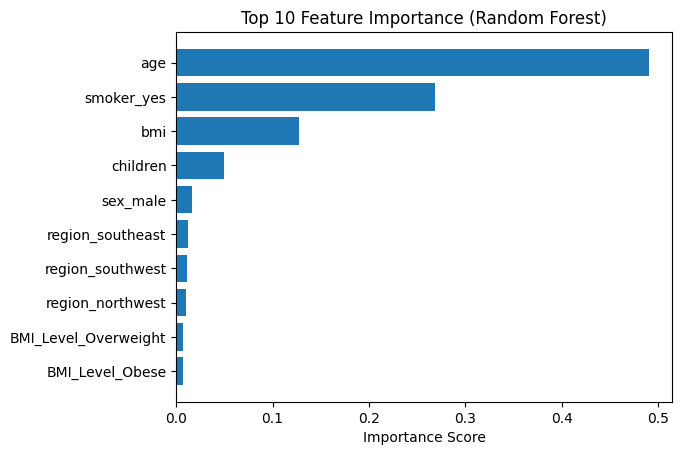

In [9]:
plt.figure()
plt.barh(
    feature_importance_df["Feature"][:10][::-1],
    feature_importance_df["Importance"][:10][::-1]
)
plt.title("Top 10 Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.show()


Model Random Forest menunjukkan bahwa status merokok dan kategori BMI merupakan faktor paling dominan dalam menentukan tingkat risiko.
Hal ini konsisten dengan hasil analisis EDA dan segmentasi manual sebelumnya.
Model ini dirancang sebagai decision support system untuk membantu institusi dalam melakukan risk stratification,
bukan sebagai alat diagnosis medis.

In [10]:
import joblib

joblib.dump(rf, "../src/risk_model_rf.pkl")

print("Model saved successfully")


Model saved successfully
